# ¿Cuánto cree la IA que vale tu casa? - Parte II

En el capítulo introductorio hicimos un repaso a las bases matemáticas del ajuste de funciones, y la optimización de los parámetros, y en el siguiente vimos cómo preparar los datos para el entrenamiento con modelos de IA, creo que ya es momento que nos metamos un poco más en materia y empezemos con Keras, una librería disponible en Python, sencilla de usar, y muy potente.

Pero ehhhhh! Alto ahí! Queda lo más importante, antes de empezar, tendremos que explicar un poco más a fondo es una red neuronal artifical, ¿no? 

## Redes Neuronales

#### Funciones de activación
Se utilizan en las neuronas para introducir no linealidades en el modelo. Estas funciones determinan si una neurona se activa o no, es decir, si envía una señal más allá de cierto umbral.

#### Pesos internos
Son parámetros ajustables en una red neuronal que se utilizan para ponderar las entradas y determinar la salida de cada neurona. Durante el entrenamiento, estos pesos se ajustan para minimizar una función de pérdida y mejorar el rendimiento del modelo.

#### Neuronas
Las neuronas son las unidades básicas de procesamiento en una red neuronal. Cada neurona toma entradas, realiza una operación en ellas y produce una salida.

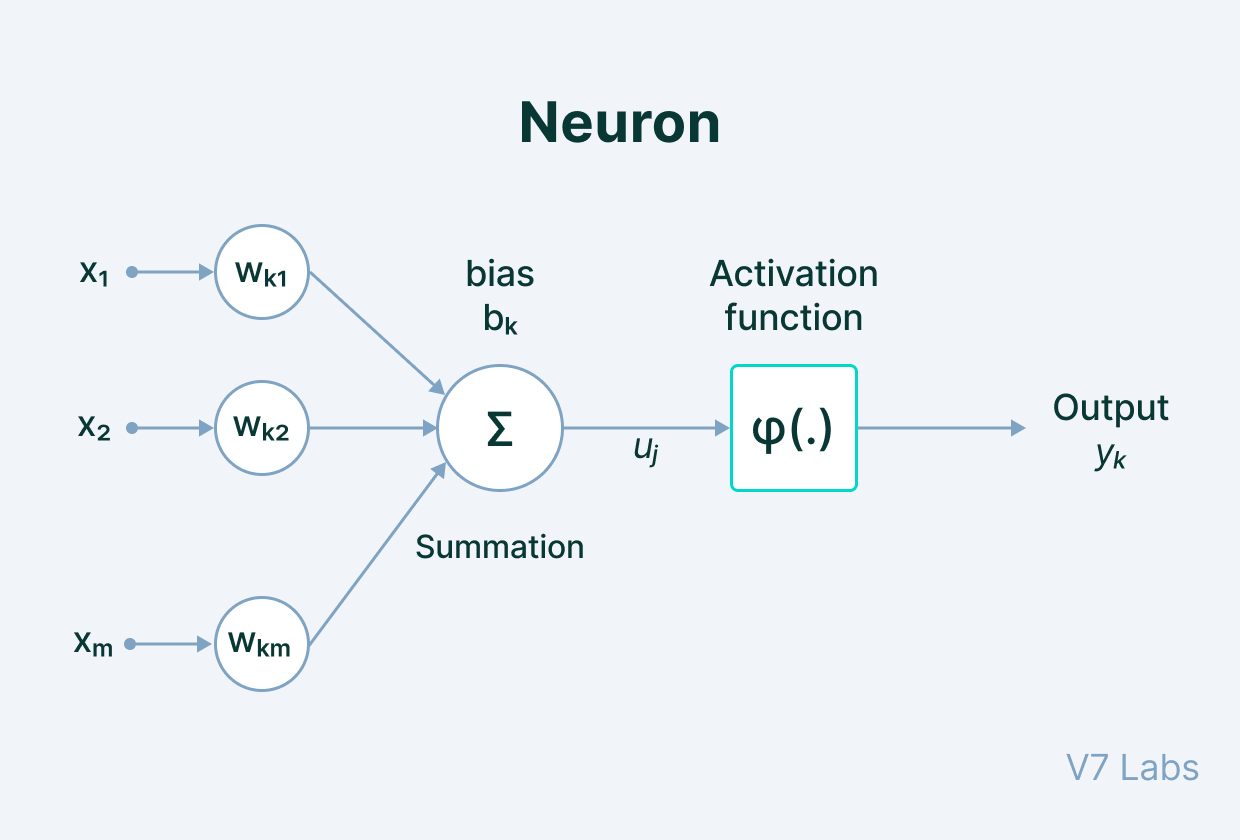

Una forma simple de definir una red neuronal es como un conjunto de operaciones matemáticas aplicadas de forma secuencial y reiterada, con el objetivo de mejorar unos parámetros, y ajustar mejor una función de pérdida. Esta es una generalización que debe ser matizada, pero puede dar una idea más intuitiva de cómo funcionan internamente los modelos.

## Construyendo un modelo con Keras para predecir el precio de la vivienda

#### Importar librerías

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


#### Cargar datos preprocesados

In [2]:
train_df = pd.read_csv('train.csv')  
test_df = pd.read_csv('test.csv')
val_df = pd.read_csv('val.csv')

# Separar características y etiquetas
X_train = train_df['area'].values.reshape(-1, 1) 
y_train = train_df['price'].values

X_val = val_df['area'].values.reshape(-1, 1)
y_val = val_df['price'].values

X_test = test_df['area'].values.reshape(-1, 1)
y_test = test_df['price'].values

#### Definir el modelo

- Número de capas ocultas: 1

- Número de neuronas en la capa: 8 

- Función de activación: RELU

- Optimizador: Adam

- Función de Pérdia: MSE

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=8, activation='relu', input_shape=(1,)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

2024-03-15 17:00:47.082378: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-15 17:00:47.218990: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-15 17:00:47.219619: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 17:00:48.280778: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Entrenamiento

In [4]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
8/8 [==============================] - 0s 16ms/step - loss: 1.2420 - val_loss: 1.0339
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 1.1909 - val_loss: 0.9899
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 1.1368 - val_loss: 0.9505
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 1.0918 - val_loss: 0.9127
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 1.0471 - val_loss: 0.8779
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 1.0093 - val_loss: 0.8446
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.9720 - val_loss: 0.8139
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 0.9324 - val_loss: 0.7879
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 0.9019 - val_loss: 0.7629
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.8741 - val_loss: 0.7390
Epoch 11/100
8/8 [==========

#### Evaluación


In [5]:
test_loss = model.evaluate(X_test, y_test)
print(f'Pérdida en los datos de prueba: {test_loss}')


6/6 [==============================] - 0s 1ms/step - loss: 0.8826
Pérdida en los datos de prueba: 0.8825673460960388


#### Visualización de resultados

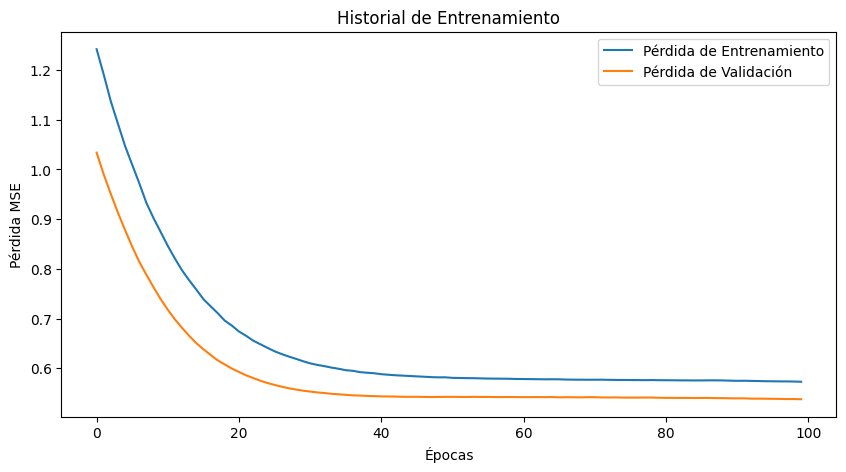

6/6 [==============================] - 0s 1ms/step


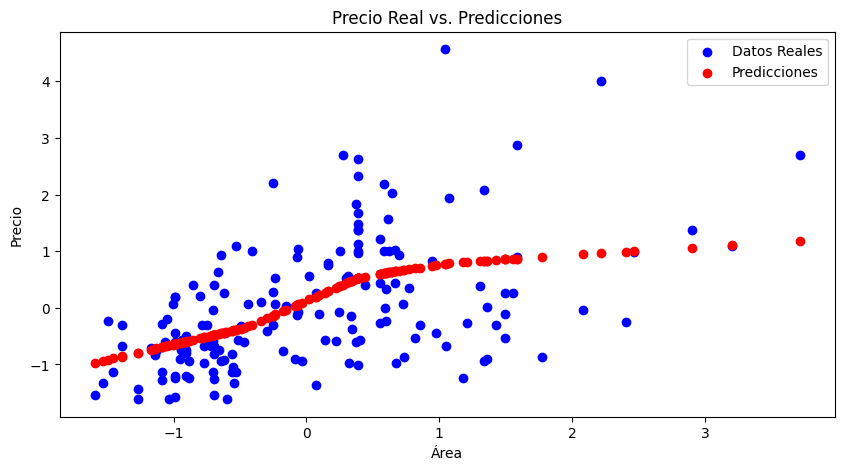

In [6]:
# Predicciones del modelo
y_pred = model.predict(X_test)

# Gráfico de dispersión de precios reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Reales')
plt.scatter(X_test, y_pred, label='Predicciones')
plt.title('Precios Reales vs. Predicciones')
plt.xlabel('Área')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Histograma de precios reales vs. predicciones
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=20, alpha=0.5, label='Reales')
plt.hist(y_pred, bins=20, alpha=0.5, label='Predicciones')
plt.title('Distribución de Precios Reales vs. Predicciones')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## Expermentando con distintas funciones de activación en la capa de salida

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=8, activation='relu', input_shape=(1,)))
model.add(Dense(units=1, activation='tanh')) # Aplicación de tanh en la capa de salida
model.compile(optimizer='adam', loss='mean_squared_error')


In [9]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
8/8 [==============================] - 0s 14ms/step - loss: 0.6726 - val_loss: 0.6152
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6625 - val_loss: 0.6071
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6538 - val_loss: 0.5998
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6449 - val_loss: 0.5941
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6376 - val_loss: 0.5892
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6324 - val_loss: 0.5844
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6261 - val_loss: 0.5805
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6214 - val_loss: 0.5768
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6170 - val_loss: 0.5733
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6128 - val_loss: 0.5700
Epoch 11/100
8/8 [==========

In [10]:
test_loss = model.evaluate(X_test, y_test)
print(f'Pérdida en los datos de prueba: {test_loss}')


6/6 [==============================] - 0s 1ms/step - loss: 0.8991
Pérdida en los datos de prueba: 0.8990916013717651


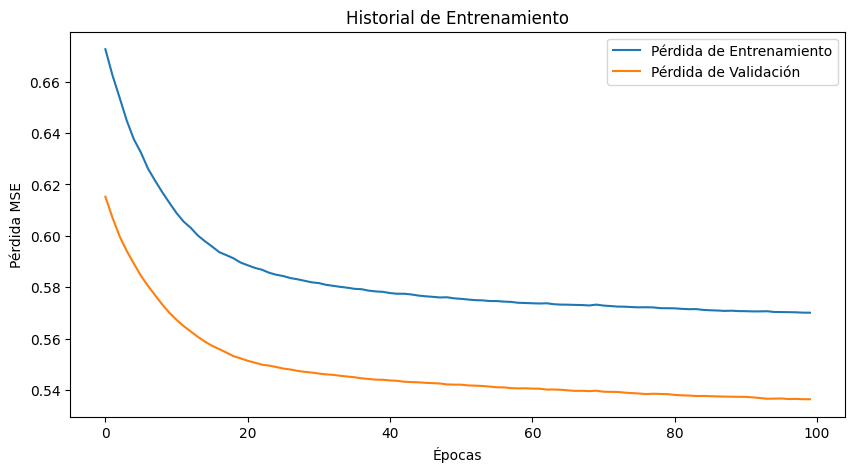

6/6 [==============================] - 0s 837us/step


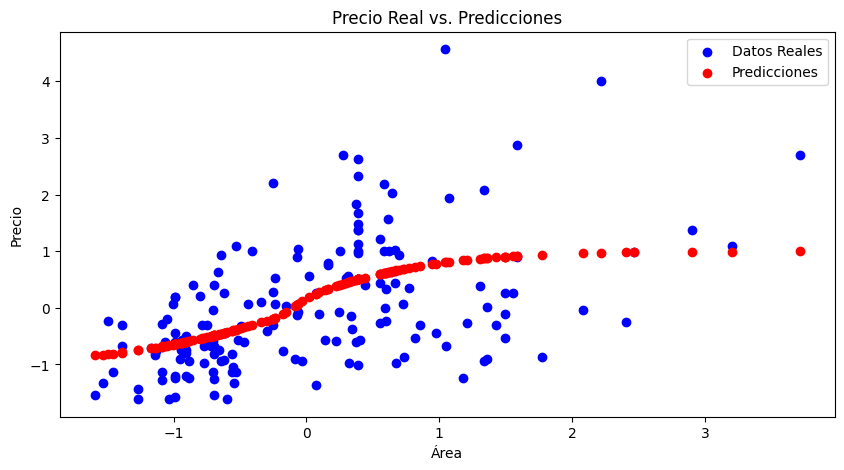

In [11]:
# Gráfico del historial de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Historial de Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida MSE')
plt.legend()
plt.show()

# Predicciones del modelo
y_pred = model.predict(X_test)

# Gráfico de precios reales vs. predicciones
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.scatter(X_test, y_pred, color='red', label='Predicciones')
plt.title('Precio Real vs. Predicciones')
plt.xlabel('Área')
plt.ylabel('Precio')
plt.legend()
plt.show()
